<a href="https://colab.research.google.com/github/Jendma/Journey/blob/main/Dicoding%20/%5BPREDICTIVE%20ANALYTICS%3A%20REGRESSION%5D%20Diamonds%20Price/Predictive_Analytics_Diamonds_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

# Observasi Dataset

In [2]:
# load the dataset
url = 'https://raw.githubusercontent.com/tidyverse/ggplot2/master/data-raw/diamonds.csv'
df = pd.read_csv(url)
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


Berdasarkan informasi dari Kaggle, variabel-variabel pada Diamond dataset adalah sebagai berikut:

- Harga dalam dolar Amerika Serikat ($) adalah fitur target.
- carat: merepresentasikan bobot (weight) dari diamonds (0.2-5.01), digunakan sebagai ukuran dari batu permata dan perhiasan.
- cut: merepresentasikan kualitas pemotongan diamonds (Fair, Good, Very Good, Premium, and Ideal).
- color: merepresentasikan warna, dari J (paling buruk) ke D (yang terbaik).
- clarity: merepresentasikan seberapa jernih diamonds (I1 (paling buruk), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (terbaik))
- x: merepresentasikan panjang diamonds dalam mm (0-10.74).
- y: merepresentasikan lebar diamonds dalam mm (0-58.9).
- z: merepresentasikan kedalaman diamonds dalam mm (0-31.8).
- depth: merepresentasikan z/mean(x, y) = 2 * z/(x + y) (43-79).
- table: merepresentasikan lebar bagian atas berlian relatif terhadap titik terlebar 43-95. \

Berikut adalah ilustrasi mengenai fitur x, y, z, depth, dan table.

![image.png](https://dicoding-web-img.sgp1.cdn.digitaloceanspaces.com/original/academy/dos:eba1d79b8ff358d29e7240bf7baa9aee20210910131412.png)

# Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [4]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [5]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [6]:
x = (df.x == 0).sum()
y = (df.y == 0).sum()
z = (df.z == 0).sum()

print("Nilai 0 di kolom x ada: ", x)
print("Nilai 0 di kolom y ada: ", y)
print("Nilai 0 di kolom z ada: ", z)

Nilai 0 di kolom x ada:  8
Nilai 0 di kolom y ada:  7
Nilai 0 di kolom z ada:  20


In [7]:
df[df['z']==0]

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [8]:
diamonds = df.loc[(df[['x','y','z']]!=0).all(axis=1)]
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [9]:
diamonds.shape

(53920, 10)

<ipython-input-10-002650a3e788>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


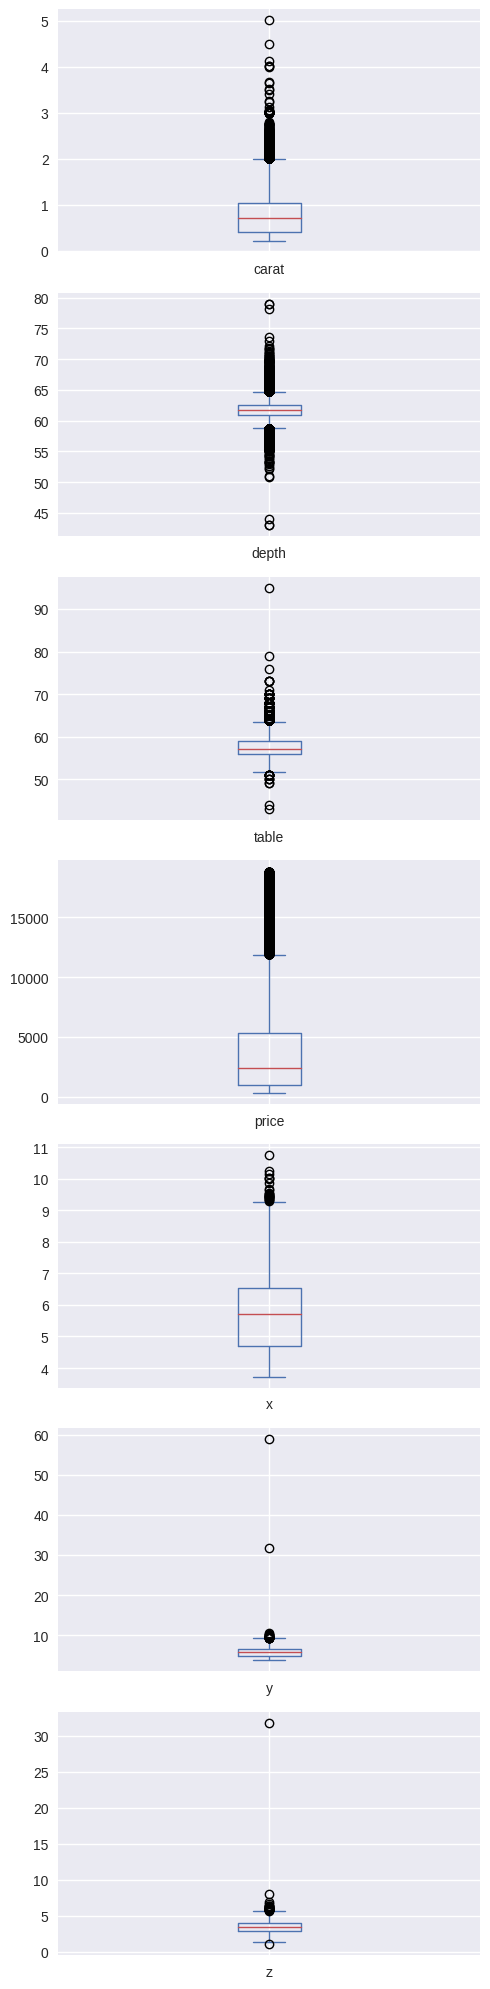

In [10]:
col = df.select_dtypes(exclude='O').columns

plt.style.use('seaborn')
fig, ax = plt.subplots(len(col), 1, figsize=(5,20))
for i,ax in zip(range(len(col)), ax.flat):
  diamonds[col[i]].plot(kind='box', ax=ax)

plt.tight_layout()
plt.show()

In [11]:
Q1 = diamonds.quantile(0.25)
Q3 = diamonds.quantile(0.75)
IQR = Q3-Q1

diamonds=diamonds[~((diamonds<(Q1-1.5*IQR))|(diamonds>(Q3+1.5*IQR))).any(axis=1)]

<ipython-input-11-2859b8914a8f>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = diamonds.quantile(0.25)
<ipython-input-11-2859b8914a8f>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = diamonds.quantile(0.75)
<ipython-input-11-2859b8914a8f>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  diamonds=diamonds[~((diamonds<(Q1-1.5*IQR))|(diamonds>(Q3+1.5*IQR))).any(axis=1)]


In [12]:
diamonds.shape

(47524, 10)

In [13]:
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


## Univariate Analysis

### Categorical Features

In [14]:
cat_cols = diamonds.select_dtypes(include='O').columns
cat_cols

Index(['cut', 'color', 'clarity'], dtype='object')

           jumlah sampel  persentase
Ideal              20340        42.8
Premium            12115        25.5
Very Good          10994        23.1
Good                3745         7.9
Fair                 330         0.7


<Axes: title={'center': 'cut'}>

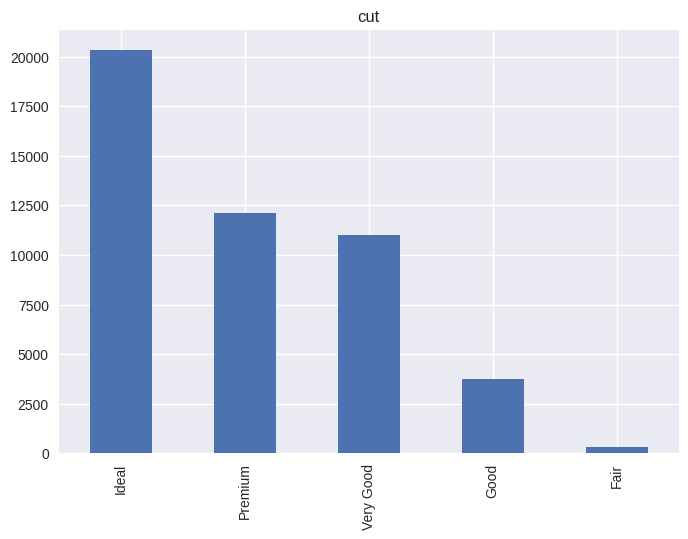

In [15]:
feature = cat_cols[0]
count = diamonds[feature].value_counts()
percent = 100*diamonds[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature)

Terdapat 5 kategori pada fitur Cut, secara berurutan dari jumlahnya yang paling banyak yaitu: Ideal, Premium, Very Good, Good, dan Fair. Dari data persentase dapat kita simpulkan bahwa lebih dari 60% sampel merupakan diamonds tipe grade tinggi, yaitu grade Ideal dan Premium.

   jumlah sampel  persentase
G          10081        21.2
E           8910        18.7
F           8466        17.8
H           7176        15.1
D           6195        13.0
I           4462         9.4
J           2234         4.7


<Axes: title={'center': 'color'}>

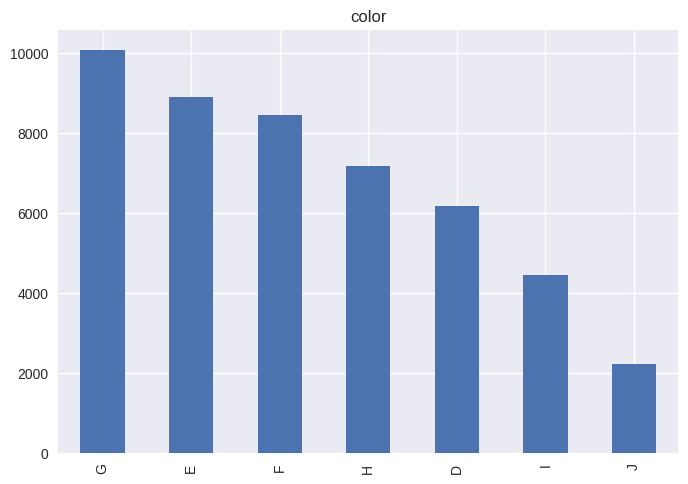

In [16]:
feature = cat_cols[1]
count = diamonds[feature].value_counts()
percent = 100*diamonds[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature)

Berdasarkan deskripsi variabel, urutan kategori warna dari yang paling buruk ke yang paling bagus adalah J, I, H, G, F, E, dan D. Dari grafik di atas, dapat kita simpulkan bahwa sebagian besar grade berada pada grade menengah, yaitu G, F, H.

      jumlah sampel  persentase
SI1           11552        24.3
VS2           10928        23.0
SI2            7402        15.6
VS1            7373        15.5
VVS2           4683         9.9
VVS1           3463         7.3
IF             1650         3.5
I1              473         1.0


<Axes: title={'center': 'clarity'}>

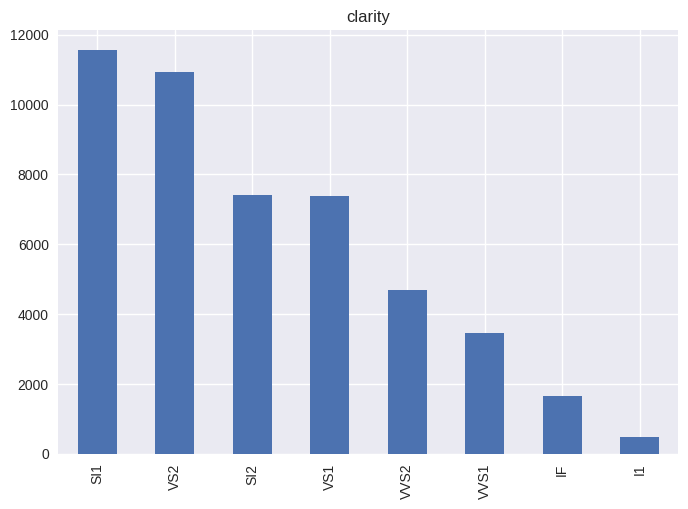

In [17]:
feature = cat_cols[2]
count = diamonds[feature].value_counts()
percent = 100*diamonds[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature)

Berdasarkan informasi dari deskripsi variabel, fitur Clarity terdiri dari 8 kategori dari yang paling buruk ke yang paling baik, yaitu: I1, SI2, SI1, VS2, VS1, VVS2, VVS1, dan IF.

1. 'IF' - Internally Flawless
2. 'VVS2' - Very Very Slight Inclusions
3. 'VVS1' - Very Very Slight Inclusions
4. 'VS1' - Very Slight Inclusions
5. 'VS2' - Very Slight Inclusions
6. 'SI2' - Slight Inclusions
7. 'SI1' - Slight Inclusions
8. 'I1' - Imperfect\

Dari grafik kita bisa menyimpulkan bahwa sebagian besar fitur merupakan grade rendah, yaitu SI1, SI2, dan VS2.



### Numerical Features

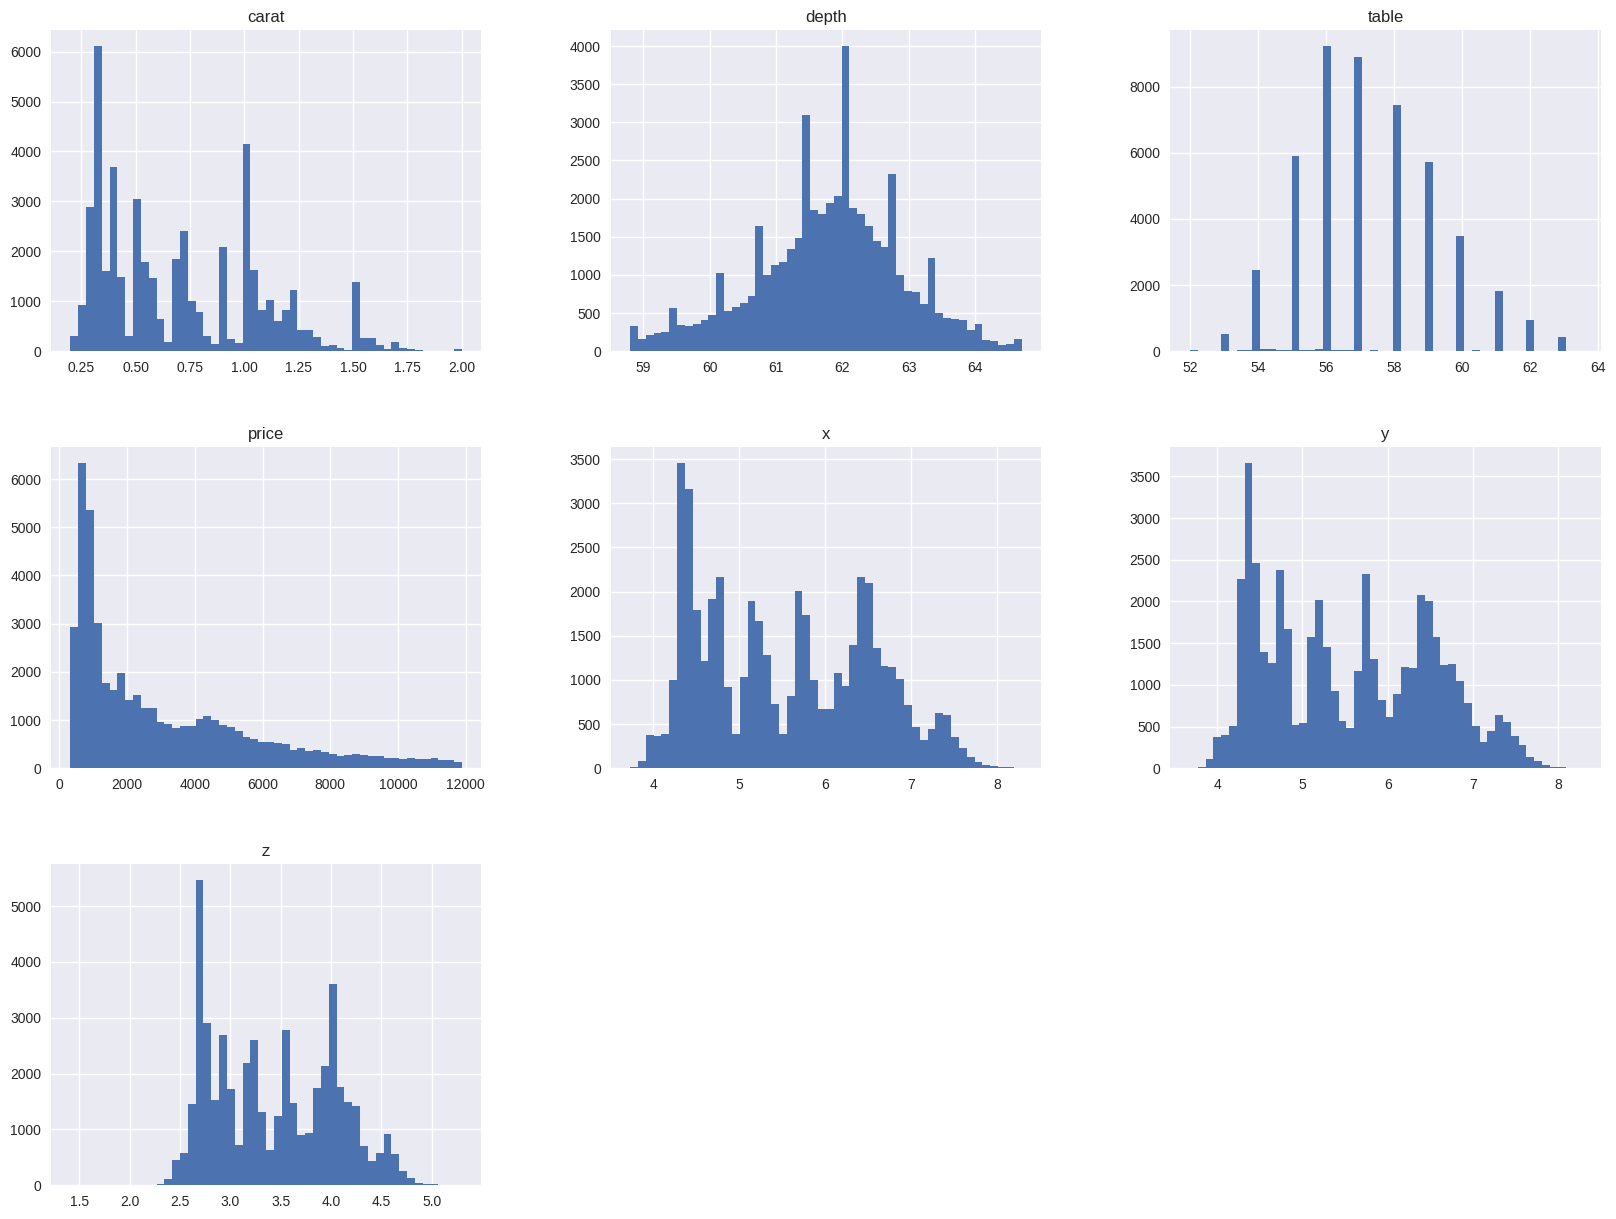

In [18]:
diamonds.hist(bins=50, figsize=(20,15))
plt.show()

Mari amati histogram di atas, khususnya histogram untuk variabel "price" yang merupakan fitur target (label) pada data kita. Dari histogram "price", kita bisa memperoleh beberapa informasi, antara lain:

- Peningkatan harga diamonds sebanding dengan penurunan jumlah sampel. Hal ini dapat kita lihat jelas dari histogram "price" yang grafiknya mengalami penurunan seiring dengan semakin banyaknya jumlah sampel (sumbu x).
- Rentang harga diamonds cukup tinggi yaitu dari skala ratusan dolar Amerika hingga sekitar $11800.

- Setengah harga berlian bernilai di bawah $2500.
- Distribusi harga miring ke kanan (right-skewed). Hal ini akan berimplikasi pada model.

## Multivariate Analysis

### Categorical Features

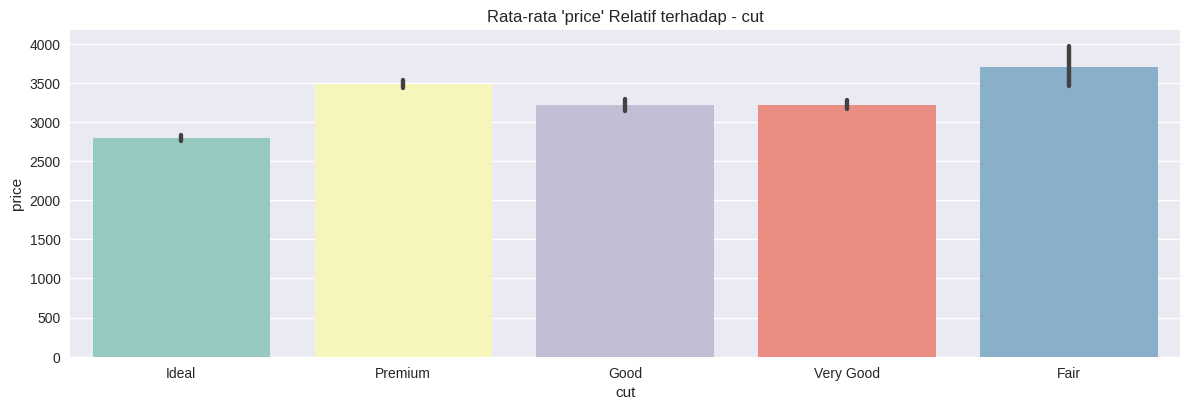

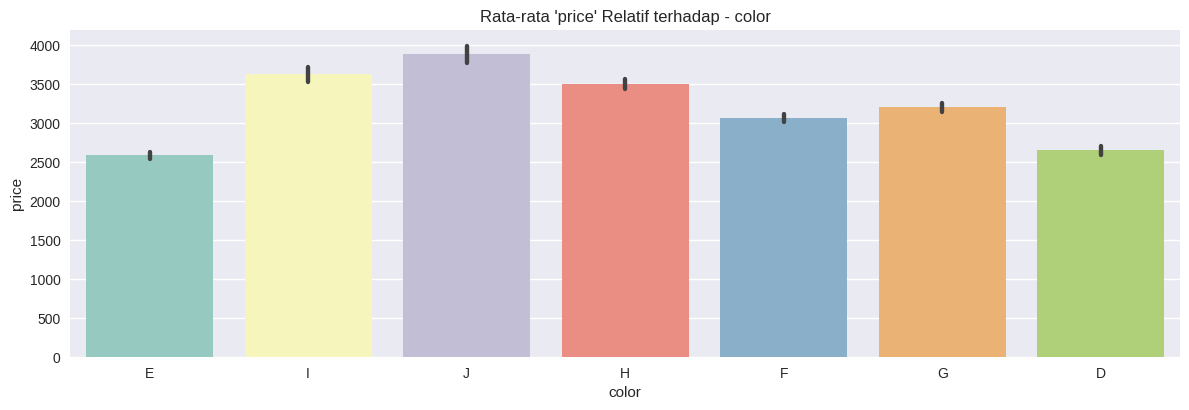

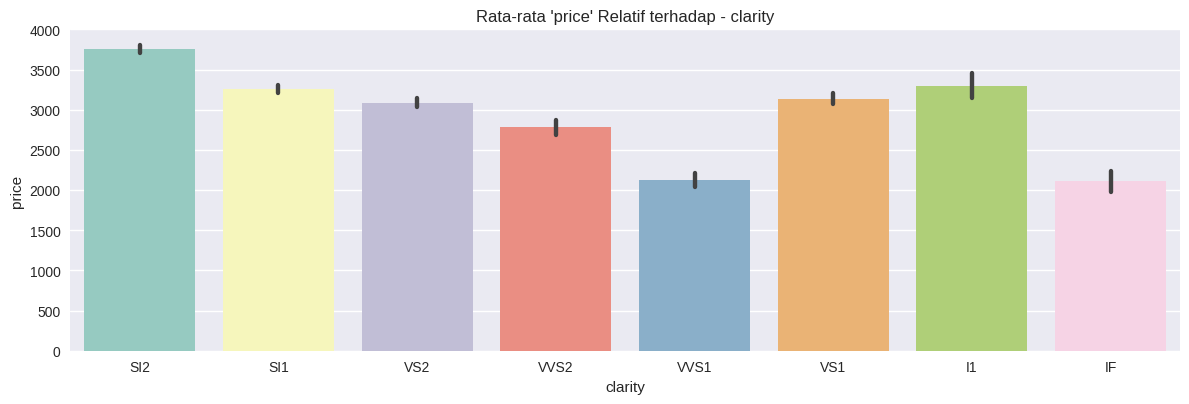

In [19]:
cat_features = diamonds.select_dtypes(include='object').columns.to_list()

for col in cat_features:
  sns.catplot(x=col, y="price", kind="bar", dodge=False, height = 4, aspect = 3,  data=diamonds, palette="Set3")
  plt.title("Rata-rata 'price' Relatif terhadap - {}".format(col))

Dengan mengamati rata-rata harga relatif terhadap fitur kategori di atas, kita memperoleh insight sebagai berikut:

- Pada fitur ‘cut’, rata-rata harga cenderung mirip. Rentangnya berada antara 3500 hingga 4500. Grade tertinggi yaitu grade Ideal memiliki harga rata-rata terendah diantara grade lainnya. Sehingga, fitur cut memiliki pengaruh atau dampak yang kecil terhadap rata-rata harga.
- Pada fitur ‘color’, semakin rendah grade warna, harga diamonds justru semakin tinggi. Dari sini dapat disimpulkan bahwa warna memiliki pengaruh yang rendah terhadap harga.
- Pada fitur ‘clarity’, secara umum, diamond dengan grade lebih rendah memiliki harga yang lebih tinggi. Hal ini berarti bahwa fitur ‘clarity’ memiliki pengaruh yang rendah terhadap harga.
Kesimpulan akhir, fitur kategori memiliki pengaruh yang rendah terhadap harga.

### Numerical Features

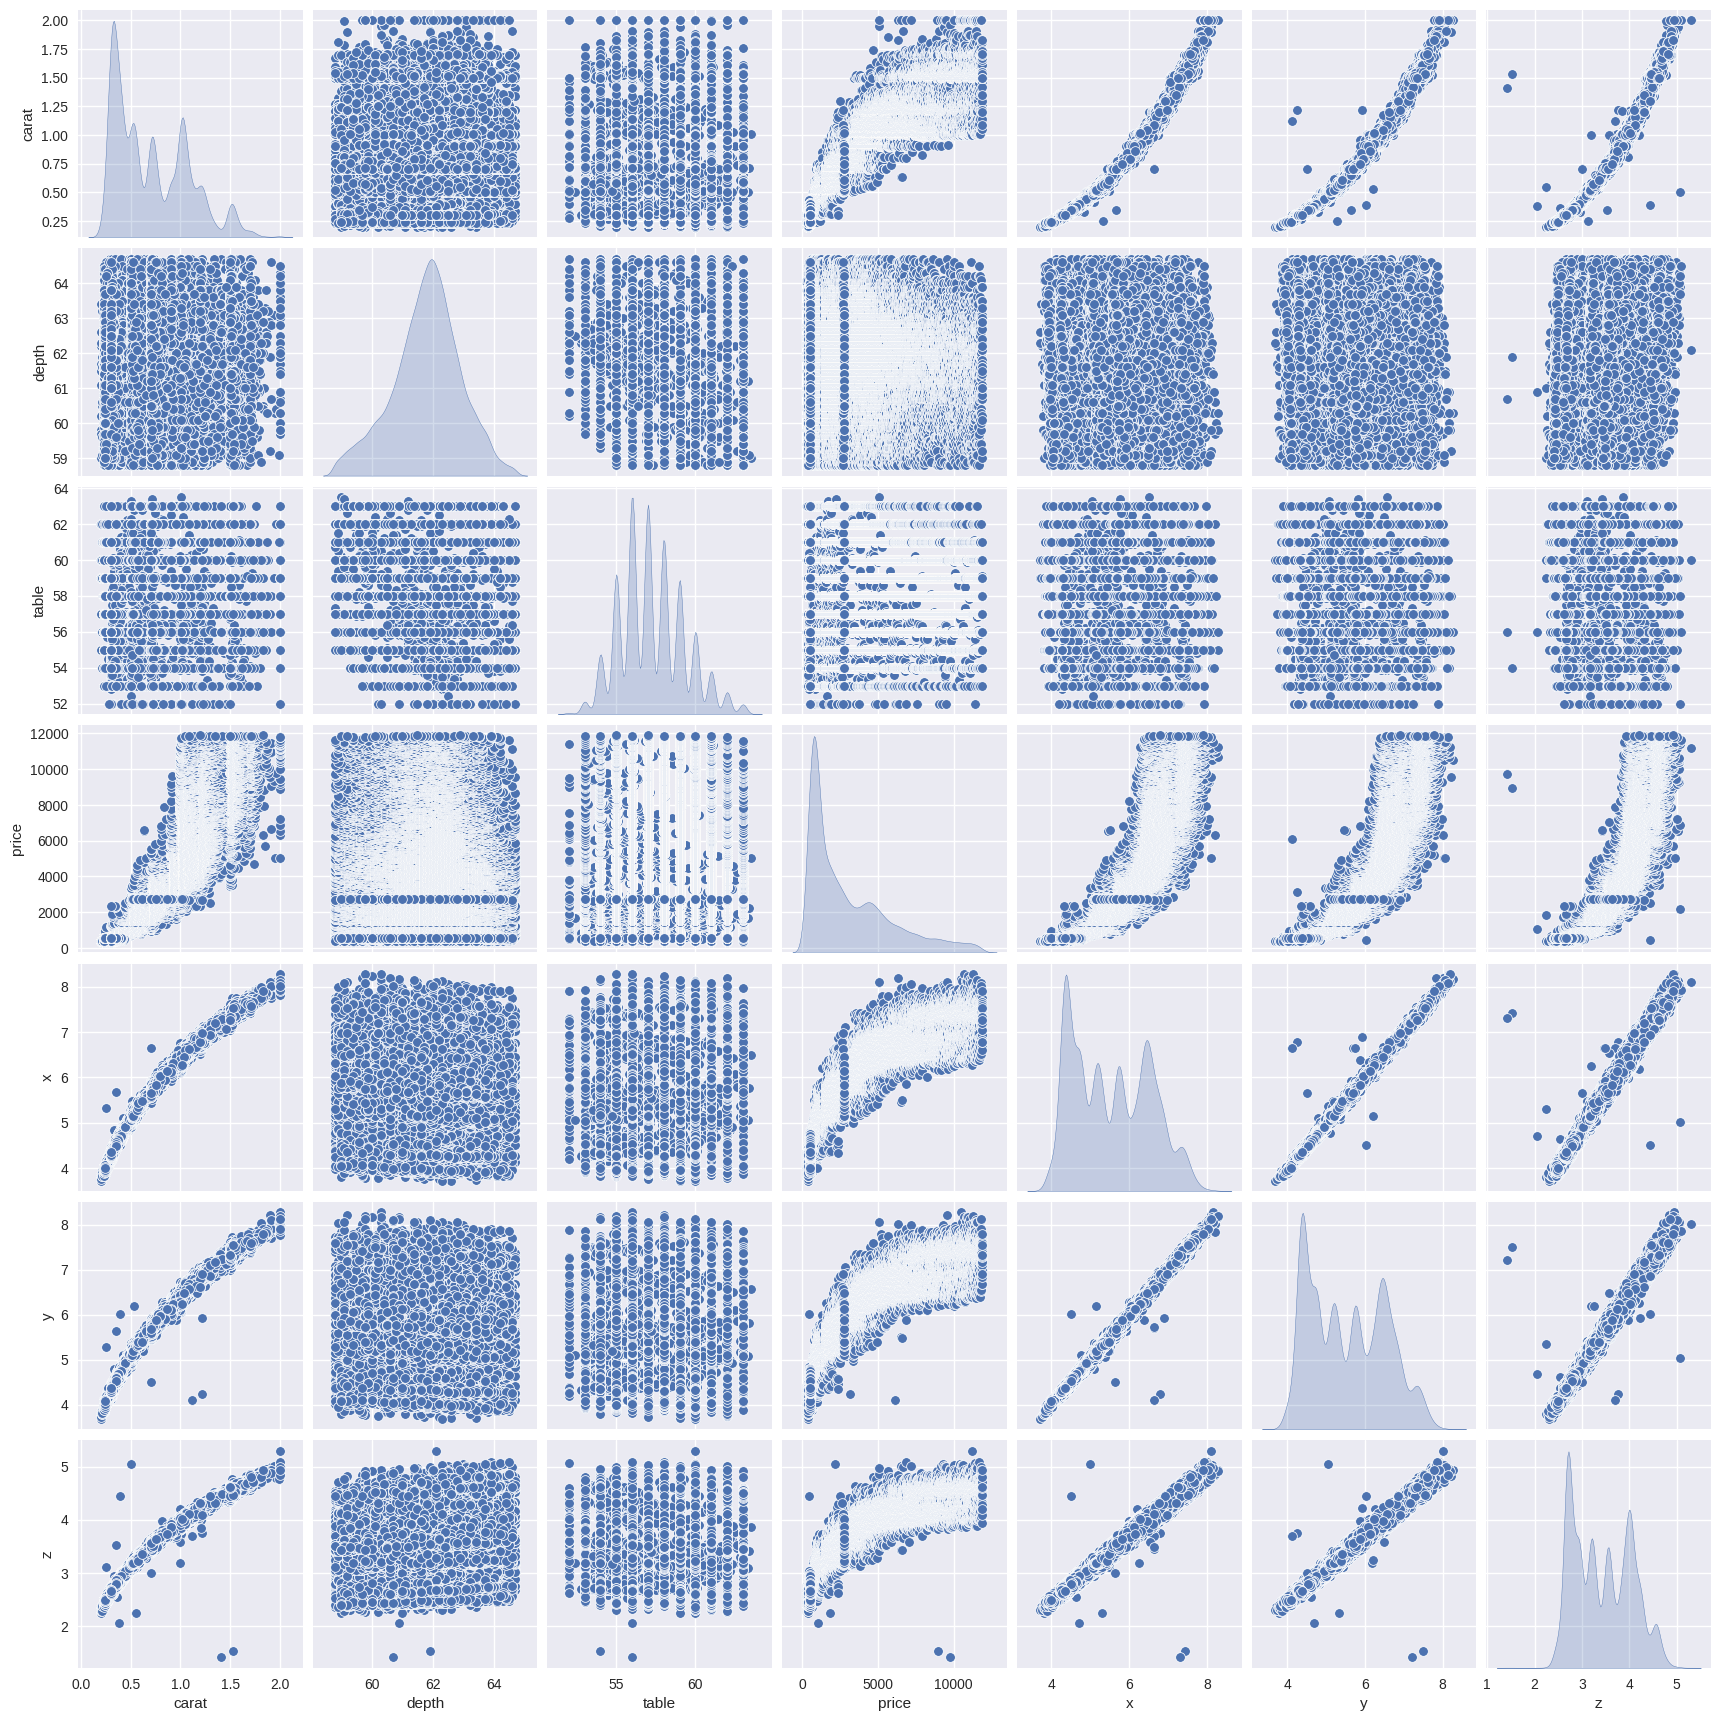

In [20]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(diamonds, diag_kind = 'kde')

![image.png](https://d17ivq9b7rppb3.cloudfront.net/original/academy/20210727121002b2a8860f3449ea7e7a750c0b0c7a8450.png)

Fungsi pairplot dari library seaborn menunjukkan relasi pasangan dalam dataset. Misalnya, relasi antara fitur ‘x’ pada sumbu x dengan fitur ‘z’ pada sumbu y atau relasi antara fitur ‘carat’ pada sumbu x dengan ‘price’ pada sumbu y. Dari grafik, kita dapat melihat plot relasi masing-masing fitur numerik pada dataset.

Pada kasus ini, kita akan melihat relasi antara semua fitur numerik dengan fitur target kita yaitu ‘price’. Untuk membacanya, perhatikan fitur pada sumbu y, temukan fitur target ‘price’, dan lihatlah grafik relasi antara semua fitur pada sumbu x dengan fitur price pada sumbu y. Dalam hal ini, fitur ‘price’ berada pada baris keempat (dari atas) sumbu y (ditandai oleh kotak merah). Sehingga, kita cukup melihat relasi antar fitur numerik dengan fitur target ‘price’ pada baris tersebut saja.

Sebelum memperhatikan pola sebaran data pada grafik pairplot di atas, mari kita pahami terlebih dahulu cara membaca korelasi pada sebaran data. Korelasi pada fitur tampak dari adanya pola pada sebaran data. Sebaran data acak merupakan indikasi korelasi yang lemah (atau tidak ada korelasi sama sekali). Sedangkan, sebaran yang memiliki pola (tidak acak) merupakan indikasi adanya korelasi. Perhatikan contoh gambar berikut.

![image.png](https://dicoding-web-img.sgp1.cdn.digitaloceanspaces.com/original/academy/dos:272ffaf6d32d76d6c46047c5c4f24a4720210920142549.png)

Dari pola sebaran data (titik-titik) pada gambar di atas, pola data grafik A memiliki korelasi positif. Hal ini ditandai dengan meningkatnya variabel pada sumbu y saat terjadi peningkatan variabel pada sumbu x. Sedangkan, pola data grafik B memiliki korelasi negatif yang ditandai dengan menurunnya variabel y saat terjadi kenaikan pada variabel x. Terakhir, sebaran pada data grafik C menunjukkan pola acak, artinya tidak ada korelasi data.

Pada pola sebaran data grafik pairplot sebelumnya, terlihat ‘carat’, ‘x’, ‘y’, dan ‘z’ memiliki korelasi yang tinggi dengan fitur "price". Sedangkan kedua fitur lainnya yaitu 'depth' dan 'table' terlihat memiliki korelasi yang lemah karena sebarannya tidak membentuk pola.

<ipython-input-21-d0049296a41e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = diamonds.corr().round(2)


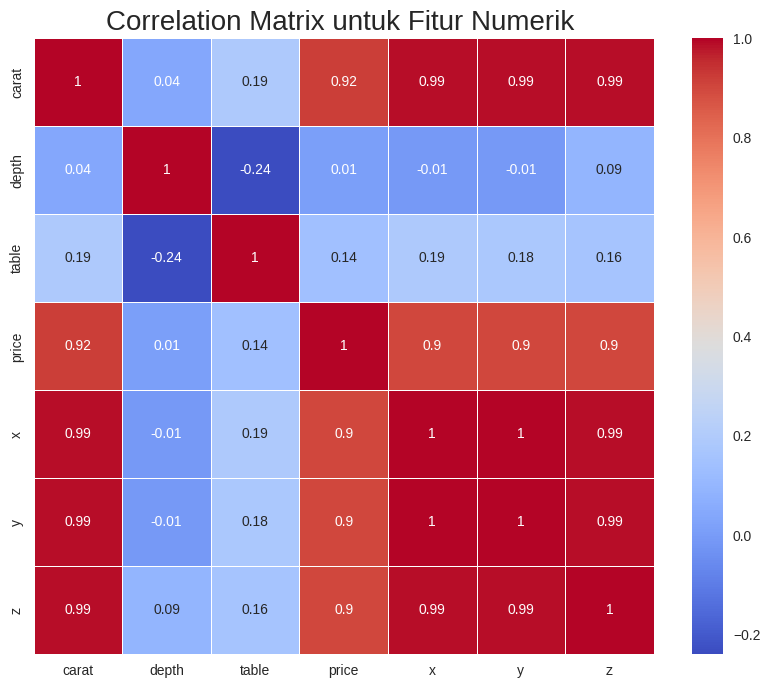

In [21]:
plt.figure(figsize=(10, 8))
correlation_matrix = diamonds.corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)
plt.show()

Koefisien korelasi berkisar antara -1 dan +1. Ia mengukur kekuatan hubungan antara dua variabel serta arahnya (positif atau negatif). Mengenai kekuatan hubungan antar variabel, semakin dekat nilainya ke 1 atau -1, korelasinya semakin kuat. Sedangkan, semakin dekat nilainya ke 0, korelasinya semakin lemah.  

Arah korelasi antara dua variabel bisa bernilai positif (nilai kedua variabel cenderung meningkat bersama-sama) maupun negatif (nilai salah satu variabel cenderung meningkat ketika nilai variabel lainnya menurun).

Nah, kembali pada grafik korelasi di atas. Jika kita amati, fitur ‘carat’, ‘x, ‘y’, dan ‘z’ memiliki skor korelasi yang besar (di atas 0.9) dengan fitur target ‘price’. Artinya, fitur 'price' berkorelasi tinggi dengan keempat fitur tersebut. Sementara itu, fitur ‘depth’ memiliki korelasi yang sangat kecil (0.01). Sehingga, fitur tersebut dapat di-drop.

In [22]:
diamonds.drop(['depth'], inplace=True, axis=1)
diamonds.head()

<ipython-input-22-901d6948aa9a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diamonds.drop(['depth'], inplace=True, axis=1)


,carat,cut,color,clarity,table,price,x,y,z
0,0.23,Ideal,E,SI2,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,61.0,326,3.89,3.84,2.31
3,0.29,Premium,I,VS2,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,57.0,336,3.94,3.96,2.48


# Data Preprocessing

## Feature Encoding

In [23]:
diamonds_prep = pd.get_dummies(diamonds, columns=['cut','color','clarity'])
diamonds_prep.head()

,carat,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,55.0,326,3.95,3.98,2.43,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,61.0,326,3.89,3.84,2.31,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,0.29,58.0,334,4.20,4.23,2.63,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0.31,58.0,335,4.34,4.35,2.75,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
5,0.24,57.0,336,3.94,3.96,2.48,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [24]:
diamonds_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47524 entries, 0 to 53939
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          47524 non-null  float64
 1   table          47524 non-null  float64
 2   price          47524 non-null  int64  
 3   x              47524 non-null  float64
 4   y              47524 non-null  float64
 5   z              47524 non-null  float64
 6   cut_Fair       47524 non-null  uint8  
 7   cut_Good       47524 non-null  uint8  
 8   cut_Ideal      47524 non-null  uint8  
 9   cut_Premium    47524 non-null  uint8  
 10  cut_Very Good  47524 non-null  uint8  
 11  color_D        47524 non-null  uint8  
 12  color_E        47524 non-null  uint8  
 13  color_F        47524 non-null  uint8  
 14  color_G        47524 non-null  uint8  
 15  color_H        47524 non-null  uint8  
 16  color_I        47524 non-null  uint8  
 17  color_J        47524 non-null  uint8  
 18  clarit

## Dimensional Reduction

Teknik reduksi (pengurangan) dimensi adalah prosedur yang mengurangi jumlah fitur dengan tetap mempertahankan informasi pada data. Teknik pengurangan dimensi yang paling populer adalah Principal Component Analysis atau disingkat menjadi PCA. Ia adalah teknik untuk mereduksi dimensi, mengekstraksi fitur, dan mentransformasi data dari “n-dimensional space” ke dalam sistem berkoordinat baru dengan dimensi m, di mana m lebih kecil dari n.

PCA bekerja menggunakan metode aljabar linier. Ia mengasumsikan bahwa sekumpulan data pada arah dengan varians terbesar merupakan yang paling penting (utama). PCA umumnya digunakan ketika variabel dalam data memiliki korelasi yang tinggi. Korelasi tinggi ini menunjukkan data yang berulang atau redundant.

Karena hal inilah, teknik PCA digunakan untuk mereduksi variabel asli menjadi sejumlah kecil variabel baru yang tidak berkorelasi linier, disebut komponen utama (PC). Komponen utama ini dapat menangkap sebagian besar varians dalam variabel asli. Sehingga, saat teknik PCA diterapkan pada data, ia hanya akan menggunakan komponen utama dan mengabaikan sisanya.

Berikut penjelasan untuk masing-masing komponen utama (PC):

- PC pertama mewakili arah varians maksimum dalam data. Ia paling banyak menangkap informasi dari semua fitur dalam data.
- PC kedua menangkap sebagian besar informasi yang tersisa setelah PC pertama.
- PC ketiga menangkap sebagian besar informasi yang tersisa setelah PC pertama, PC kedua, dst.

![image.png](https://dicoding-web-img.sgp1.cdn.digitaloceanspaces.com/original/academy/dos:a1b540517a0d04f8bc6a96f1d7a6677e20210912093416.png)

Jika kita cek menggunakan fungsi pairplot, ketiga fitur ukuran diamonds dalam kolom ‘x’, ‘y’, dan ‘z’ memiliki korelasi yang tinggi. Hal ini karena ketiga fitur ini memiliki informasi yang sama, yaitu ukuran diamonds.

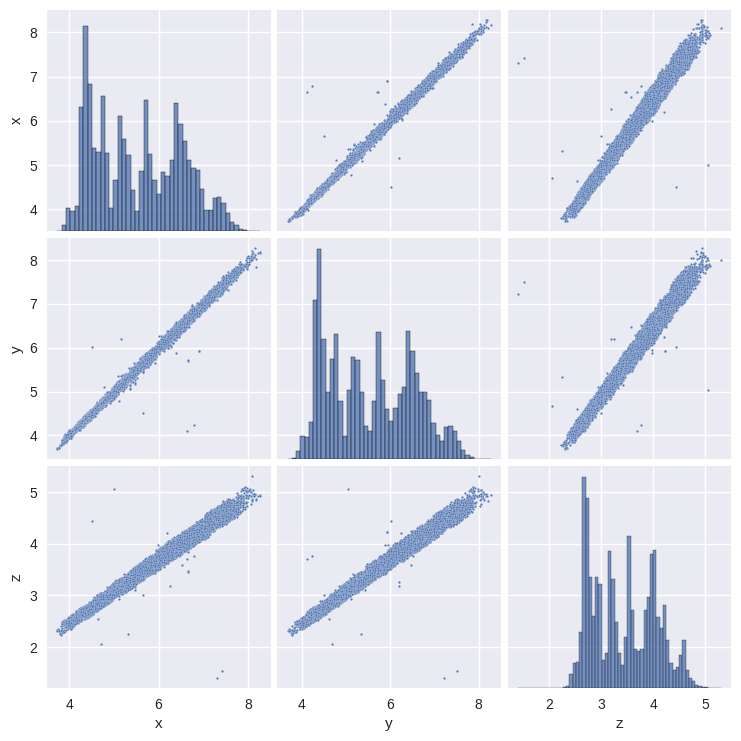

In [25]:
sns.pairplot(diamonds_prep[['x','y','z']], plot_kws={"s": 3});

In [26]:
pca = PCA(n_components=1, random_state=42)
diamonds_prep['dimension'] = pca.fit_transform(diamonds_prep.loc[:,['x','y','z']]).flatten()

In [27]:
pca.explained_variance_ratio_.round(3)

array([0.998])

Arti dari output di atas adalah, 99.8% informasi pada ketiga fitur ‘x’, ‘y’, ‘z’ terdapat pada PC pertama. Sedangkan sisanya, sebesar 0.2% dan 0.1% terdapat pada PC kedua dan ketiga. Perhatikanlah, jumlahnya jadi > 100%. Hal ini disebabkan oleh proses pembulatan (round) dalam 3 desimal ya, jadi tidak perlu khawatir.

Berdasarkan hasil ini, kita akan mereduksi fitur (dimensi) dan hanya mempertahankan PC (komponen) pertama saja. PC pertama ini akan menjadi fitur dimensi atau ukuran berlian menggantikan ketiga fitur lainnya ('x', 'y', 'z'). Kita beri nama fitur ini 'dimension'.

In [28]:
diamonds_prep.head()

,carat,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,dimension
0,0.23,55.0,326,3.95,3.98,2.43,0,0,1,0,...,0,0,0,0,1,0,0,0,0,-2.452585
1,0.21,61.0,326,3.89,3.84,2.31,0,0,0,1,...,0,0,0,1,0,0,0,0,0,-2.630066
3,0.29,58.0,334,4.20,4.23,2.63,0,0,0,1,...,0,0,0,0,0,0,1,0,0,-2.048530
4,0.31,58.0,335,4.34,4.35,2.75,0,1,0,0,...,1,0,0,0,1,0,0,0,0,-1.831975
5,0.24,57.0,336,3.94,3.96,2.48,0,0,0,0,...,1,0,0,0,0,0,0,0,1,-2.451982


In [29]:
diamonds_prep.drop(['x','y','z'], axis=1, inplace=True)
diamonds_prep.head()

,carat,table,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,...,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,dimension
0,0.23,55.0,326,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,-2.452585
1,0.21,61.0,326,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,-2.630066
3,0.29,58.0,334,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,-2.048530
4,0.31,58.0,335,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,-1.831975
5,0.24,57.0,336,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,-2.451982


## Train Test Split

In [30]:
X = diamonds_prep.drop(['price'], axis=1).copy()
y = diamonds_prep.loc[:,['price']]

In [31]:
X.head()

,carat,table,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,...,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,dimension
0,0.23,55.0,0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,-2.452585
1,0.21,61.0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,-2.630066
3,0.29,58.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,-2.048530
4,0.31,58.0,0,1,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,-1.831975
5,0.24,57.0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,-2.451982


In [32]:
y.head()

,price
0,326
1,326
3,334
4,335
5,336


In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.1, random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((42771, 23), (4753, 23), (42771, 1), (4753, 1))

In [34]:
X_train

,carat,table,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,...,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,dimension
52420,0.78,63.0,0,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0.606281
44667,0.32,55.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,-1.740357
41205,0.53,54.0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,-0.542356
4580,0.93,53.0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,1.096160
35241,0.37,62.0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,-1.364816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12256,1.01,57.0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1.407734
50916,0.56,56.0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,-0.307392
43949,0.31,55.0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,-1.808249
951,0.50,54.0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,-0.685427


In [35]:
X_test

,carat,table,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,...,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,dimension
51619,0.72,58.0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0.296621
23536,1.51,59.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2.718213
10413,1.01,56.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1.390968
3157,0.78,58.0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0.562899
1566,0.72,56.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0.400635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27794,0.37,57.0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,-1.460596
18564,1.13,55.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1.802271
45527,0.59,56.0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,-0.254548
14219,1.20,56.0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,2.073341


In [36]:
y_train

,price
52420,2512
44667,523
41205,1205
4580,3651
35241,894
...,...
12256,5206
50916,2318
43949,516
951,2889


In [37]:
y_test

,price
51619,2396
23536,11540
10413,4779
3157,3334
1566,3005
...,...
27794,649
18564,7571
45527,1684
14219,5763


## Data Scaling

StandardScaler melakukan proses standarisasi fitur dengan mengurangkan mean (nilai rata-rata) kemudian membaginya dengan standar deviasi untuk menggeser distribusi.  StandardScaler menghasilkan distribusi dengan standar deviasi sama dengan 1 dan mean sama dengan 0. Sekitar 68% dari nilai akan berada di antara -1 dan 1.

In [38]:
sc = StandardScaler()
num_feat = ['carat','table','dimension']
X_train.loc[:,num_feat] = sc.fit_transform(X_train.loc[:,num_feat])
X_test.loc[:,num_feat] = sc.transform(X_test.loc[:,num_feat])

In [39]:
X_train

,carat,table,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,...,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,dimension
52420,0.188441,2.841243,0,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0.398508
44667,-1.050556,-1.117556,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,-1.158743
41205,-0.484927,-1.612406,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,-0.363739
4580,0.592462,-2.107255,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0.723596
35241,-0.915882,2.346393,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,-0.909531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12256,0.807940,-0.127856,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0.930360
50916,-0.404123,-0.622706,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,-0.207814
43949,-1.077491,-1.117556,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,-1.203797
951,-0.565731,-1.612406,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,-0.458682


In [40]:
X_test

,carat,table,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,...,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,dimension
51619,0.026833,0.366994,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0.193015
23536,2.154675,0.861843,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1.800006
10413,0.807940,-0.622706,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0.919234
3157,0.188441,0.366994,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0.369719
1566,0.026833,-0.622706,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0.262039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27794,-0.915882,-0.127856,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,-0.973091
18564,1.131156,-1.117556,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1.192178
45527,-0.323319,-0.622706,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,-0.172746
14219,1.319699,-0.622706,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1.372063


In [41]:
X_train.describe().round(4)

,carat,table,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,...,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,dimension
count,42771.0000,42771.0000,42771.0000,42771.0000,42771.0000,42771.0000,42771.0000,42771.0000,42771.0000,42771.0000,...,42771.0000,42771.0000,42771.0000,42771.0000,42771.0000,42771.0000,42771.0000,42771.0000,42771.0000,42771.0000
mean,0.0000,0.0000,0.0069,0.0799,0.4279,0.2548,0.2305,0.1298,0.1879,0.1779,...,0.0476,0.0100,0.0346,0.2434,0.1562,0.1548,0.2302,0.0724,0.0983,-0.0000
std,1.0000,1.0000,0.0828,0.2711,0.4948,0.4358,0.4211,0.3361,0.3906,0.3825,...,0.2130,0.0995,0.1828,0.4291,0.3630,0.3618,0.4210,0.2591,0.2977,1.0000
min,-1.3738,-2.6021,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-1.8868
25%,-0.8889,-0.6227,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.9284
50%,-0.2694,-0.1279,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.1061
75%,0.8079,0.8618,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.8842
max,3.4745,3.0887,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,2.6982


In [42]:
X_test.describe().round(4)

,carat,table,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,...,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,dimension
count,4753.0000,4753.0000,4753.0000,4753.0000,4753.000,4753.0000,4753.0000,4753.0000,4753.0000,4753.0000,...,4753.0000,4753.0000,4753.0000,4753.0000,4753.0000,4753.0000,4753.0000,4753.0000,4753.0000,4753.0000
mean,-0.0360,0.0090,0.0074,0.0690,0.429,0.2556,0.2390,0.1351,0.1841,0.1801,...,0.0414,0.0095,0.0356,0.2403,0.1519,0.1578,0.2272,0.0772,0.1006,-0.0383
std,0.9950,1.0036,0.0855,0.2535,0.495,0.4363,0.4265,0.3418,0.3876,0.3843,...,0.1993,0.0969,0.1852,0.4273,0.3590,0.3646,0.4191,0.2670,0.3008,0.9998
min,-1.3468,-2.6021,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-1.7459
25%,-0.9428,-0.6227,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.9764
50%,-0.3503,-0.1279,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.1937
75%,0.8079,0.8618,0.0000,0.0000,1.000,1.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.8652
max,3.4745,2.8412,1.0000,1.0000,1.000,1.0000,1.0000,1.0000,1.0000,1.0000,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,2.6903


# Modelling

In [43]:
# Prepare dataframe for models analysis
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'Boosting'])

## KNN

KNN adalah algoritma yang relatif sederhana dibandingkan dengan algoritma lain. Algoritma KNN menggunakan ‘kesamaan fitur’ untuk memprediksi nilai dari setiap data yang baru. Dengan kata lain, setiap data baru diberi nilai berdasarkan seberapa mirip titik tersebut dalam set pelatihan.

KNN bekerja dengan membandingkan jarak satu sampel ke sampel pelatihan lain dengan memilih sejumlah k tetangga terdekat (dengan k adalah sebuah angka positif). Nah, itulah mengapa algoritma ini dinamakan K-nearest neighbor (sejumlah k tetangga terdekat). KNN bisa digunakan untuk kasus klasifikasi dan regresi. Pada modul ini, kita akan menggunakannya untuk kasus regresi.

Bagaimana algoritma KNN bekerja pada kasus regresi? Perhatikan penjelasan dan ilustrasi berikut ya.

Bayangkan Anda ingin memprediksi berapa lama waktu yang diperlukan untuk perjalanan dari rumah ke kantor. Setiap hari selama beberapa minggu, Anda mencatat waktu berangkat dan lama perjalanan yang dibutuhkan hingga sampai di kantor. Waktu perjalanan Anda tentu dipengaruhi oleh beberapa hal, misalnya arus lalu lintas yang bervariasi di pagi hari. Hal ini menyebabkan waktu perjalanan Anda berubah, tergantung jam berapa Anda berangkat. Contoh grafik waktu keberangkatan dan lama perjalanan dapat dilihat pada gambar berikut.

![image.png](https://dicoding-web-img.sgp1.cdn.digitaloceanspaces.com/original/academy/dos:bea0f636166f3e09ca919ac77886fa2320210912093945.png)

Kemudian, dengan memilih sebuah nilai X pada sumbu Waktu Keberangkatan, kita akan menentukan tiga titik (k=3) prediksi paling dekat dengan nilai X yang dipilih. Pada grafik ini ditandai dengan lingkaran merah pada titik hitam. Nilai prediksi terbaik untuk X berdasarkan ketiga titik ini adalah titik kecil berwarna merah. Perhatikanlah titik merah kecil di antara tiga titik hitam dengan lingkaran merah. Titik merah kecil ini diperoleh dari jarak rata-rata ketiga titik hitam dengan lingkaran merah.

![image.png](https://dicoding-web-img.sgp1.cdn.digitaloceanspaces.com/original/academy/dos:aa8a48b19669575f82f163f9734ff84120211014104232.png)

Selanjutnya, bayangkan Anda melakukan ini pada semua kemungkinan nilai masukan sehingga memperoleh nilai prediksi di beberapa tempat.

![image.png](https://dicoding-web-img.sgp1.cdn.digitaloceanspaces.com/original/academy/dos:a7df87ff2115e0fc1da456cc245014f520211014104336.png)

Tahap terakhir adalah menghubungkan setiap prediksi ini sehingga memberi kita hasil regresi sebagai berikut:

![image.png](https://dicoding-web-img.sgp1.cdn.digitaloceanspaces.com/original/academy/dos:ee3340dc5fa3c81fff0c56942926a71720210912094451.png)

Pada contoh kasus di atas, kita membuat prediksi dengan nilai k = 3. Memilih nilai k yang lebih besar dapat membantu menghindari overfit, meskipun kadang bisa menyebabkan kehilangan kemampuan prediksi. Pada prediksi dengan nilai k = 1 (hanya mengecek satu tetangga terdekat), maka hasilnya akan sangat rigid atau kaku. Sedangkan jika kita set nilai k lebih besar, misalnya pada kasus ini k = 10, maka hasil prediksi akan lebih smooth (halus).

![image.png](https://dicoding-web-img.sgp1.cdn.digitaloceanspaces.com/original/academy/dos:07942fa0c26e69b34aa15a9d63678b4320210912094515.png)

Pemilihan nilai k sangat penting dan berpengaruh terhadap performa model. Jika kita memilih k yang terlalu rendah, maka akan menghasilkan model yang overfit dan hasil prediksinya memiliki varians tinggi. Jika kita memilih k terlalu tinggi, maka model yang dihasilkan akan underfit dan prediksinya memiliki bias yang tinggi. Namun, kita dapat mencoba beberapa nilai k yang berbeda, misal: nilai dari 1 hingga 20, kemudian membandingkan mana nilai yang paling sesuai untuk model.

Selanjutnya, untuk menentukan titik mana dalam data yang paling mirip dengan input baru, KNN menggunakan perhitungan ukuran jarak. Metrik ukuran jarak yang digunakan secara default pada library sklearn adalah Minkowski distance [27]. Beberapa metrik ukuran jarak yang juga sering dipakai antara lain: Euclidean distance dan Manhattan distance.

In [45]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

## Random Forest

Algoritma random forest adalah salah satu algoritma supervised learning. Ia dapat digunakan untuk menyelesaikan masalah klasifikasi dan regresi. Random forest juga merupakan algoritma yang sering digunakan karena cukup sederhana tetapi memiliki stabilitas yang mumpuni.

Random forest merupakan salah satu model machine learning yang termasuk ke dalam kategori ensemble (group) learning. Apa itu model ensemble? Sederhananya, ia merupakan model prediksi yang terdiri dari beberapa model dan bekerja secara bersama-sama. Ide dibalik model ensemble adalah sekelompok model yang bekerja bersama menyelesaikan masalah. Sehingga, tingkat keberhasilan akan lebih tinggi dibanding model yang bekerja sendirian. Pada model ensemble, setiap model harus membuat prediksi secara independen. Kemudian, prediksi dari setiap model ensemble ini digabungkan untuk membuat prediksi akhir.

Ada dua teknik pendekatan dalam membuat model ensemble, yaitu bagging dan boosting. Jangan bingung dulu dengan istilah ini ya. Kita akan bahas satu per satu.

Bagging atau bootstrap aggregating adalah teknik yang melatih model dengan sampel random. Dalam teknik bagging, sejumlah model dilatih dengan teknik sampling with replacement (proses sampling dengan penggantian). Ketika kita melakukan sampling with replacement, sampel dengan nilai yang berbeda bersifat independen. Artinya, nilai suatu sampel tidak mempengaruhi sampel lainnya. Akibatnya, model yang dilatih akan berbeda antara satu dan lainnya.

Berikut adalah ilustrasi pembuatan model ensemble dengan teknik bagging.

![image.png](https://dicoding-web-img.sgp1.cdn.digitaloceanspaces.com/original/academy/dos:ed261bc234501cdd72cbd4f15030114e20210912094746.png)

Algoritma yang cocok untuk teknik bagging ini adalah decision tree. Nah, random forest pada dasarnya adalah versi bagging dari algoritma decision tree. Bayangkan Anda memiliki satu bag (tas) random forest yang berisi beberapa model decision tree. Model decision tree masing-masing memiliki hyperparameter yang berbeda dan dilatih pada beberapa bagian (subset) data yang berbeda juga. Teknik pembagian data pada algoritma decision tree adalah memilih sejumlah fitur dan sejumlah sampel secara acak dari dataset yang terdiri dari n fitur dan m sampel.

Misalnya, ada 100 model decision tree pada bag random forest kita, ini berarti bahwa keputusan (decision) yang dibuat oleh setiap pohon (model) akan sangat bervariasi. Pada kasus klasifikasi, prediksi akhir diambil dari prediksi terbanyak pada seluruh pohon. Sedangkan, pada kasus regresi, prediksi akhir adalah rata-rata prediksi seluruh pohon dalam model ensemble.

![image.png](https://dicoding-web-img.sgp1.cdn.digitaloceanspaces.com/original/academy/dos:5e086364e59025d11dd0dfd3bc965e7c20210912094833.png)

Sekarang tentu Anda mengerti, mengapa algoritma ini disebut sebagai random forest. Karena algoritma ini disusun dari banyak algoritma pohon (decision tree) yang pembagian data dan fiturnya dipilih secara acak.

In [47]:
# buat model prediksi
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

<ipython-input-47-98c44c641d2b>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(X_train, y_train)


## Boosting Algorithm

Seperti namanya, boosting, algoritma ini bertujuan untuk meningkatkan performa atau akurasi prediksi. Caranya adalah dengan menggabungkan beberapa model sederhana dan dianggap lemah (weak learners) sehingga membentuk suatu model yang kuat (strong ensemble learner). Algoritma boosting muncul dari gagasan mengenai apakah algoritma yang sederhana seperti linear regression dan decision tree dapat dimodifikasi untuk dapat meningkatkan performa.

Algoritma boosting telah ada sejak puluhan tahun lalu. Namun, baru beberapa tahun ini ramai dibicarakan. Mengapa algoritma ini begitu populer akhir-akhir ini?

Salah satu alasannya adalah peningkatan algoritma boosting dalam kompetisi machine learning atau data science. Algoritma ini sangat powerful dalam meningkatkan akurasi prediksi. Algoritma boosting sering mengungguli model yang lebih sederhana seperti logistic regression dan random forest. Beberapa pemenang kompetisi di platform Kaggle menyatakan bahwa mereka menggunakan algoritma boosting atau kombinasi beberapa algoritma boosting dalam modelnya. Meskipun demikian, hal ini tetap bergantung pada kasus per kasus, ruang lingkup masalah, dan dataset yang digunakan.

Dilihat dari caranya memperbaiki kesalahan pada model sebelumnya, algoritma boosting terdiri dari dua metode:

Adaptive boosting
Gradient boosting
Pada modul ini, kita akan menggunakan metode adaptive boosting. Salah satu metode adaptive boosting yang terkenal adalah AdaBoost, dikenalkan oleh Freund and Schapire (1995). Pertanyaannya adalah, bagaimana AdaBoost bekerja?

Awalnya, semua kasus dalam data latih memiliki weight atau bobot yang sama. Pada setiap tahapan, model akan memeriksa apakah observasi yang dilakukan sudah benar? Bobot yang lebih tinggi kemudian diberikan pada model yang salah sehingga mereka akan dimasukkan ke dalam tahapan selanjutnya. Proses iteratif ini berlanjut sampai model mencapai akurasi yang diinginkan.

In [50]:
boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Model Evaluate

In [51]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

# Panggil mse
mse

,train,test
KNN,203.010965,241.327309
RF,50.601799,134.972315
Boosting,905.169153,884.701693


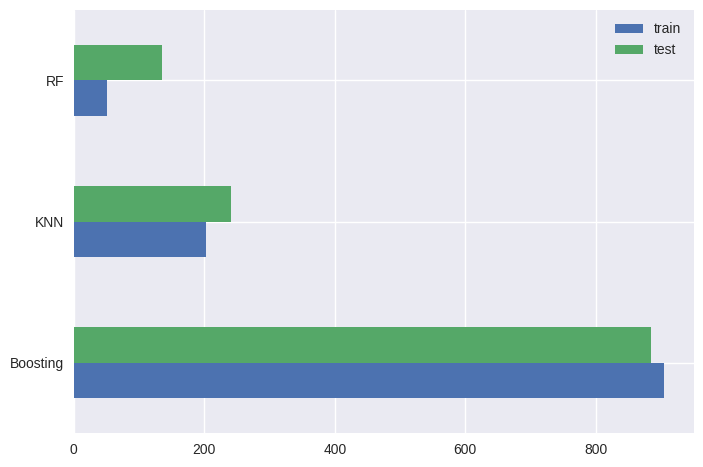

In [52]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Dari gambar di atas, terlihat bahwa, model Random Forest (RF) memberikan nilai eror yang paling kecil. Sedangkan model dengan algoritma Boosting memiliki eror yang paling besar (berdasarkan grafik, angkanya di atas 800). Model inilah yang akan kita pilih sebagai model terbaik untuk melakukan prediksi harga diamonds.

Untuk mengujinya, mari kita buat prediksi menggunakan beberapa harga dari data test.

In [91]:
prediksi = X_test.iloc[10:11].copy()
pred_dict = {'y_true':y_test['price'].values[10:11]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = np.reshape(model.predict(prediksi).round(1),1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
0,1262,1080.7,1206.5,1707.3


Terlihat bahwa prediksi dengan Random Forest (RF) memberikan hasil yang paling mendekati. Anda juga bisa menguji hasil prediksi pada data lain dengan cara mengubah indeks pada X_test. Jika Anda merasa belum yakin dengan model ini, lakukanlah pengaturan parameter pada algoritma yang digunakan. Sebagai contoh, pada algoritma Random Forest, Anda dapat mengubah berbagai parameter seperti n_estimators (jumlah pohon/trees dalam forest), atau parameter lain. Anda dapat merujuk pada dokumentasi Random Forest pada library sklearn untuk pengaturan parameter lainnya.

Untuk melakukan peningkatan performa, lakukanlah hal yang sama (pengaturan parameter) pada semua algoritma yang digunakan. Selain itu, Anda juga dapat melakukan optimasi parameter dengan menerapkan teknik Grid Search.